<div style="background-image: url('https://1.bp.blogspot.com/-aIEang7exy0/U_ToZJH4kyI/AAAAAAAAAZk/-1pOlY2rBgw/s728/network-security.jpg');
background-size: 100% 100%;
font-size: 30px">

<strong><br><br><br><br><br><br><br><br>NETWORK INTRUSION DETECTION<br><br></strong>
</div>

## BUSINESS CONTEXT:

With the enormous growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly more important. All the computer systems suffer from security vulnerabilities which are both technically difficult and economically costly to be solved by the manufacturers. Therefore, the role of Intrusion Detection Systems (IDSs), as special-purpose devices to detect anomalies and attacks in the network, is becoming more important.
## BUSINESS PROBLEM:

Our task  to detect anamolies and attacks in the network by building network intrusion detection system. 

Here we will be constructing a Binomial Classification Model to find whether an  Activity is normal or attack

## DATA AVAILABILITY:

This data is KDDCUP’99 data set, which is widely used as one of the few publicly available data sets for network-based anomaly detection systems.

For more about data: http://www.unb.ca/cic/datasets/nsl.html

<div style="background-color:#3366ff;text-align: center ; font-size: 250%"><strong><br>
Importing Necessary Libraries
<br><br></strong></div>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')

# warnings
import warnings
warnings.filterwarnings('ignore')

<div style="background-color:#3366ff;text-align: center ;font-size: 250%"><strong><br>
Importing Datasets
<br><br></strong></div>

In [8]:
import os
os.chdir("C:\\Users\\user\\Desktop\\Alab_Python\\Final Projects in Python\\3. Network Intrusion Detection System")

In [9]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 
                 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 
                 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack','last_flag']

train_df = pd.read_csv("Train.txt", sep = ',', header = None, names = column_names)
test_df = pd.read_csv("Test.txt", sep = ',', header = None, names = column_names)

In [10]:
train_df.shape, test_df.shape

((125973, 43), (22544, 43))

In [11]:
train_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
duration,0,0,0,0,0,0,0,0,0,0
protocol_type,tcp,udp,tcp,tcp,tcp,tcp,tcp,tcp,tcp,tcp
service,ftp_data,other,private,http,http,private,private,private,remote_job,private
flag,SF,SF,S0,SF,SF,REJ,S0,S0,S0,S0
src_bytes,491,146,0,232,199,0,0,0,0,0
dst_bytes,0,0,0,8153,420,0,0,0,0,0
land,0,0,0,0,0,0,0,0,0,0
wrong_fragment,0,0,0,0,0,0,0,0,0,0
urgent,0,0,0,0,0,0,0,0,0,0
hot,0,0,0,0,0,0,0,0,0,0


In [12]:
# columns present in the training dataset
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'last_flag'],
      dtype='object')

In [13]:
#train_df.info(null_counts=False)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 non-null int64
num_file_creations             125973 

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
Missing value check
<br><br></strong></div>

In [14]:
train_df.isna().sum().where(lambda x: x>0).dropna()

Series([], dtype: float64)

In [15]:
test_df.isna().sum().where(lambda x: x>0).dropna()

Series([], dtype: float64)

There is no missing values in both Train and Test Set

In [16]:
# number of missing values in each variables of training dataset
#train_df.isna().sum()

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
Data Audit Report
<br><br></strong></div>

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
 Creating a UDF to get the summary of the variables
<br><br></strong></div>

In [17]:
# Creating a UDF to get the summary of the continous variables for data exploration and analysis
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), (x.isnull().sum()/x.isnull().count()*100), x.sum(), x.min(), 
                      x.mean(), x.median(), x.std(), x.var(), x.quantile(.01), x.quantile(.05), x.quantile(.10), 
                      x.quantile(.25), x.quantile(.50), x.quantile(.75), x.quantile(.90), x.quantile(.95), 
                      x.quantile(.99), x.max()], 
                      index = ['N', 'NMISS', '%MISS', 'SUM', 'MIN', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'P1', 'P5', 
                               'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

# Creating a UDF to get the summary of categorical varibles for data exploration and analysis
def categorical_var_summary(x):
    Mode = x.value_counts().reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1],(Mode.iloc[0, 1]*100)/x.count()], 
                      index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERC'])

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Segregating columns in Categorical and Continuous groups
<br><br></strong></div>


In [18]:
cat_cols=train_df.loc[:, train_df.dtypes == 'object'].columns.tolist()
conti_cols= list(set(train_df.columns)-set(cat_cols))

len(cat_cols),len(conti_cols)

(4, 39)

In [19]:
print(f">>Total Columns in train dataset:{train_df.shape[1]}\n")
cat_cols.sort()
conti_cols.sort()

print("-"*50)
print("\t categorical columns: ",len(cat_cols))
print("-"*50)
print(cat_cols)

print("\n","-"*50)
print("\t continuous columns: ",len(conti_cols))
print("-"*50)
print(conti_cols)

>>Total Columns in train dataset:43

--------------------------------------------------
	 categorical columns:  4
--------------------------------------------------
['attack', 'flag', 'protocol_type', 'service']

 --------------------------------------------------
	 continuous columns:  39
--------------------------------------------------
['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'dst_host_same_src_port_rate', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_count', 'dst_host_srv_diff_host_rate', 'dst_host_srv_rerror_rate', 'dst_host_srv_serror_rate', 'duration', 'hot', 'is_guest_login', 'is_host_login', 'land', 'last_flag', 'logged_in', 'num_access_files', 'num_compromised', 'num_failed_logins', 'num_file_creations', 'num_outbound_cmds', 'num_root', 'num_shells', 'rerror_rate', 'root_shell', 'same_srv_rate', 'serror_rate', 'src_bytes', 'srv_count', 'srv_diff_host_rate', 'srv_rerror_rate', 'srv_serror_rat

In [59]:
# splitting the continous and categorical variables 
#train_df_conti_vars=train_df.loc[:,(train_df.dtypes == 'float64')|(train_df.dtypes == 'int64')|(train_df.dtypes == 'float32')|(train_df.dtypes == 'int32')]
#train_df_cat_vars=train_df.loc[:, train_df.dtypes == 'object']

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Data Audit Report for continous variables of train dataset
<br><br></strong></div>

In [20]:
# a brief summary of the continous variables of training dataset
train_df[conti_cols].apply(continous_var_summary).T.round(4)

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
count,125973.0,0.0,0.0,1.059528e+07,0.0,84.1076,14.00,1.145086e+02,1.311222e+04,1.0,1.00,1.00,2.00,14.00,143.00,256.00,286.00,511.00,5.110000e+02
diff_srv_rate,125973.0,0.0,0.0,7.942930e+03,0.0,0.0631,0.00,1.803000e-01,3.250000e-02,0.0,0.00,0.00,0.00,0.00,0.06,0.07,0.29,1.00,1.000000e+00
dst_bytes,125973.0,0.0,0.0,2.491634e+09,0.0,19779.1144,0.00,4.021269e+06,1.617061e+13,0.0,0.00,0.00,0.00,0.00,516.00,3375.80,8314.00,25519.00,1.309937e+09
dst_host_count,125973.0,0.0,0.0,2.294585e+07,0.0,182.1489,255.00,9.920620e+01,9.841873e+03,1.0,3.00,11.00,82.00,255.00,255.00,255.00,255.00,255.00,2.550000e+02
dst_host_diff_srv_rate,125973.0,0.0,0.0,1.044960e+04,0.0,0.0830,0.02,1.889000e-01,3.570000e-02,0.0,0.00,0.00,0.00,0.02,0.07,0.10,0.56,1.00,1.000000e+00
dst_host_rerror_rate,125973.0,0.0,0.0,1.496960e+04,0.0,0.1188,0.00,3.066000e-01,9.400000e-02,0.0,0.00,0.00,0.00,0.00,0.00,0.84,1.00,1.00,1.000000e+00
dst_host_same_src_port_rate,125973.0,0.0,0.0,1.869173e+04,0.0,0.1484,0.00,3.090000e-01,9.550000e-02,0.0,0.00,0.00,0.00,0.00,0.06,0.84,1.00,1.00,1.000000e+00
dst_host_same_srv_rate,125973.0,0.0,0.0,6.566238e+04,0.0,0.5212,0.51,4.489000e-01,2.016000e-01,0.0,0.00,0.01,0.05,0.51,1.00,1.00,1.00,1.00,1.000000e+00
dst_host_serror_rate,125973.0,0.0,0.0,3.583333e+04,0.0,0.2845,0.00,4.448000e-01,1.978000e-01,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
dst_host_srv_count,125973.0,0.0,0.0,1.456916e+07,0.0,115.6530,63.00,1.107027e+02,1.225510e+04,1.0,1.00,2.00,10.00,63.00,255.00,255.00,255.00,255.00,2.550000e+02


<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Data Audit Report for continous variables of test dataset
<br><br></strong></div>

In [22]:
# a brief summary of the continous variables of training dataset
test_df[conti_cols].apply(continous_var_summary).T.round()

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
count,22544.0,0.0,0.0,1781615.0,0.0,79.0,8.0,129.0,1.652200e+04,1.0,1.0,1.0,1.0,8.0,123.0,256.0,401.0,511.0,511.0
diff_srv_rate,22544.0,0.0,0.0,2121.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
dst_bytes,22544.0,0.0,0.0,46350888.0,0.0,2056.0,46.0,21219.0,4.502586e+08,0.0,0.0,0.0,0.0,46.0,601.0,4099.0,8314.0,26032.0,1345927.0
dst_host_count,22544.0,0.0,0.0,4370592.0,0.0,194.0,255.0,94.0,8.843000e+03,1.0,6.0,20.0,121.0,255.0,255.0,255.0,255.0,255.0,255.0
dst_host_diff_srv_rate,22544.0,0.0,0.0,2041.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
dst_host_rerror_rate,22544.0,0.0,0.0,5261.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
dst_host_same_src_port_rate,22544.0,0.0,0.0,2982.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
dst_host_same_srv_rate,22544.0,0.0,0.0,13723.0,0.0,1.0,1.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
dst_host_serror_rate,22544.0,0.0,0.0,2205.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
dst_host_srv_count,22544.0,0.0,0.0,3173080.0,0.0,141.0,168.0,112.0,1.249600e+04,1.0,1.0,3.0,15.0,168.0,255.0,255.0,255.0,255.0,255.0


<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Data Audit Report for categoriacl variables of train dataset
<br><br></strong></div>

In [23]:
# a brief summary of the categorical variables of training dataset
train_df[cat_cols].apply(categorical_var_summary).T.round()

,N,NMISS,MODE,FREQ,PERC
attack,125973,0,normal,67343,53.4583
flag,125973,0,SF,74945,59.4929
protocol_type,125973,0,tcp,102689,81.5167
service,125973,0,http,40338,32.0211


<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Data Audit Report for continous variables of test dataset
<br><br></strong></div>

In [24]:
# a brief summary of the categorical variables of test dataset
test_df[cat_cols].apply(categorical_var_summary).T.round()

,N,NMISS,MODE,FREQ,PERC
attack,22544,0,normal,9711,43.0758
flag,22544,0,SF,14875,65.9821
protocol_type,22544,0,tcp,18880,83.7473
service,22544,0,http,7853,34.8341


<div style="background-color:#3366ff;text-align: center; font-size: 300%"><strong><br>
DATA PREPARATION
<br><br></strong></div>


In [25]:
train_df[cat_cols].head()

,attack,flag,protocol_type,service
0,normal,SF,tcp,ftp_data
1,normal,SF,udp,other
2,neptune,S0,tcp,private
3,normal,SF,tcp,http
4,normal,SF,tcp,http


### Type of attacks

In [26]:
train_df['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

<div class="alert alert-warning"><strong>NOTE:</strong>
 <br>>Total attack types are as follows:<br><tt>normal , neptune , warezclient , ipsweep , portsweep , teardrop , nmap , satan , smurf , pod , back , guess_passwd , ftp_write , multihop , rootkit , buffer_overflow , imap , warezmaster , phf , land , loadmodule , spy , perl</tt>
 <br><br>>For binomial classification, 
    <br>the target variable is assigned  with 0 when the activity is 'normal' and 
    <br>whenever there is an attack it is assigned  with 1</div>

In [27]:
# using 'attack' variables to define the target variable.
train_df['activity']= train_df['attack'].apply(lambda x: 0 if x == 'normal' else 1)

cat_cols.append('activity') #enlisting 'activity' as categorical column

In [172]:
# the count of observations of each activity and each protocol type
pd.crosstab(index=train_df['protocol_type'], 
            columns=train_df['activity'],
            margins=True
           ).rename(columns={0:"normal_activity",1:"attack"})

activity,normal_activity,attack,All
protocol_type,,,
icmp,1309,6982,8291
tcp,53600,49089,102689
udp,12434,2559,14993
All,67343,58630,125973


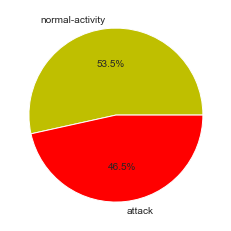

In [29]:
plt.pie(train_df['activity'].value_counts(),
        labels=['normal-activity','attack'],
        colors=['y','r'], 
        autopct='%1.1f%%');

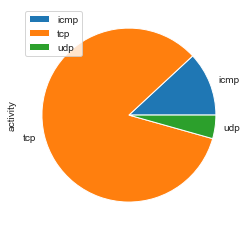

In [31]:
# the graphical representation of 
#the count of observation of each activity by protocol_type

train_df[['activity','protocol_type']].groupby('protocol_type').sum().plot(kind='pie',subplots=True)
plt.show()

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
Outlier Treatment
<br><br></strong></div>

In [32]:
# clipping the outliers with p3 and p97

train_df[conti_cols]=train_df[conti_cols].apply(lambda x: x.clip(lower=x.dropna().quantile(.03),upper=x.quantile(.97)))

In [33]:
train_df[conti_cols].apply(continous_var_summary).T.round()

,N,NMISS,%MISS,SUM,MIN,MEAN,MEDIAN,STD,VAR,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
count,125973.0,0.0,0.0,10010168.0,1.0,79.0,14.0,101.0,10197.0,1.0,1.0,1.0,2.0,14.0,143.0,256.0,286.0,301.0,301.0
diff_srv_rate,125973.0,0.0,0.0,6754.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
dst_bytes,125973.0,0.0,0.0,139569087.0,0.0,1108.0,0.0,2624.0,6887793.0,0.0,0.0,0.0,0.0,0.0,516.0,3376.0,8314.0,11715.0,11715.0
dst_host_count,125973.0,0.0,0.0,22948974.0,2.0,182.0,255.0,99.0,9833.0,2.0,3.0,11.0,82.0,255.0,255.0,255.0,255.0,255.0,255.0
dst_host_diff_srv_rate,125973.0,0.0,0.0,9695.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
dst_host_rerror_rate,125973.0,0.0,0.0,14970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
dst_host_same_src_port_rate,125973.0,0.0,0.0,18692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
dst_host_same_srv_rate,125973.0,0.0,0.0,65662.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
dst_host_serror_rate,125973.0,0.0,0.0,35833.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
dst_host_srv_count,125973.0,0.0,0.0,14569159.0,1.0,116.0,63.0,111.0,12255.0,1.0,1.0,2.0,10.0,63.0,255.0,255.0,255.0,255.0,255.0


<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
Count of zeroes in columns
<br><br></strong></div>

In [34]:
# count of zeroes in each continuous variable
df_zero=pd.DataFrame((train_df[conti_cols] == 0).astype(int).sum(axis=0),columns=['zero_count'])
df_zero['percentage']=round(df_zero['zero_count']/train_df.shape[0]*100,2)
df_zero.sort_values(by='percentage', ascending=False)

,zero_count,percentage
wrong_fragment,125973,100.00
hot,125973,100.00
num_root,125973,100.00
num_outbound_cmds,125973,100.00
num_file_creations,125973,100.00
num_failed_logins,125973,100.00
num_compromised,125973,100.00
num_access_files,125973,100.00
root_shell,125973,100.00
land,125973,100.00


In [35]:
#continous variables having all zero values 
del_zero_col=df_zero[df_zero['zero_count']==train_df.shape[0]].index.tolist()
del_zero_col

['hot',
 'is_guest_login',
 'is_host_login',
 'land',
 'num_access_files',
 'num_compromised',
 'num_failed_logins',
 'num_file_creations',
 'num_outbound_cmds',
 'num_root',
 'num_shells',
 'root_shell',
 'su_attempted',
 'urgent',
 'wrong_fragment']

In [36]:
train_df.shape

(125973, 44)

In [37]:
# dropping continous variables having all zero values 
train_df = train_df.drop(columns = del_zero_col)
print(train_df.shape)

(125973, 29)


In [38]:
#updating continuous columns
conti_cols_new=[x for x in conti_cols if x not in del_zero_col]
len(conti_cols),len(conti_cols_new)

(39, 24)

<div style="background-color:#ccd9ff;font-size: 250%"><strong><br>
 Standardizing the numerical variables
<br><br></strong></div>

<div class="alert alert-warning"><strong>NOTE:</strong>
 <br>The values of the columns are assigned with values (0,1,2,3,4) based on their values compared to the corresponding quantiles as follows:
    <br><br> for a value x in a column,
    <br> <strong>x=0</strong> if x<= quantile(.25)<br> <strong>x=1</strong> if quantile(.25)< x <= quantile(.50)<br> <strong>x=2</strong> if quantile(.50)< x<= quantile(.75)<br> <strong>x=3</strong> if quantile(.75)< x<= quantile(.95)<br> <strong>x=4</strong> if x > quantile(.95)</div>

In [39]:
#conti_cols_new

In [40]:
# standardizing the variables
scale_cols= ['dst_bytes', 'src_bytes', 'duration', 'count', 'srv_count', 
             'dst_host_count', 'dst_host_srv_count', 'last_flag']

In [41]:
train_df[scale_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
dst_bytes,125973.0,1107.928583,2624.460482,0.0,0.0,0.0,516.0,11714.68
src_bytes,125973.0,286.462551,599.388819,0.0,0.0,44.0,276.0,2974.00
duration,125973.0,1.310416,5.851432,0.0,0.0,0.0,0.0,31.00
count,125973.0,79.462806,100.982523,1.0,2.0,14.0,143.0,301.00
srv_count,125973.0,23.233042,48.993857,1.0,2.0,8.0,18.0,227.00
dst_host_count,125973.0,182.173752,99.161027,2.0,82.0,255.0,255.0,255.00
dst_host_srv_count,125973.0,115.653029,110.702716,1.0,10.0,63.0,255.0,255.00
last_flag,125973.0,19.633652,1.773077,15.0,18.0,20.0,21.0,21.00


In [42]:
#[x for x in conti_cols_new if x not in scale_cols]

In [43]:
scaled_df = train_df.copy()

for col in scale_cols:
    scaled_df.loc[(scaled_df[col] <= scaled_df[col].quantile(.25)),col] = 0
    scaled_df.loc[(scaled_df[col] > scaled_df[col].quantile(.25)) & (scaled_df[col] <= scaled_df[col].quantile(.50)), col] = 1
    scaled_df.loc[(scaled_df[col] > scaled_df[col].quantile(.50)) & (scaled_df[col] <= scaled_df[col].quantile(.75)), col] = 2
    scaled_df.loc[(scaled_df[col] > scaled_df[col].quantile(.75)) & (scaled_df[col] <= scaled_df[col].quantile(.95)), col] = 3
    scaled_df.loc[(scaled_df[col] > scaled_df[col].quantile(.95)), col] = 4
    
    scaled_df[col]=scaled_df[col].astype('int')  

In [44]:
for col in scale_cols:
    print(f"---------------\n >>{col}:\n---------------\n{scaled_df[col].value_counts()}")

---------------
 >>dst_bytes:
---------------
0    67967
2    26525
3    25682
4     5799
Name: dst_bytes, dtype: int64
---------------
 >>src_bytes:
---------------
0    49392
2    30262
3    25165
1    14943
4     6211
Name: src_bytes, dtype: int64
---------------
 >>duration:
---------------
0    115955
4      6278
3      3740
Name: duration, dtype: int64
---------------
 >>count:
---------------
0    37250
2    31528
1    25819
3    25204
4     6172
Name: count, dtype: int64
---------------
 >>srv_count:
---------------
0    38231
2    30462
1    28343
3    22731
4     6206
Name: srv_count, dtype: int64
---------------
 >>dst_host_count:
---------------
1    94365
0    31608
Name: dst_host_count, dtype: int64
---------------
 >>dst_host_srv_count:
---------------
2    62731
1    31707
0    31535
Name: dst_host_srv_count, dtype: int64
---------------
 >>last_flag:
---------------
2    62557
0    33793
1    29623
Name: last_flag, dtype: int64


<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
Dummy variable creation for categorical columns
<br><br></strong></div>

In [45]:
#check
print(">> Unique value counts in categorical columns of original dataset: \n-------------------------------------------------")
for col in cat_cols:
    print(col,scaled_df[col].nunique())

>> Unique value counts in categorical columns of original dataset: 
-------------------------------------------------
attack 23
flag 11
protocol_type 3
service 70
activity 2


In [46]:
scaled_df.shape

(125973, 29)

In [47]:
#train_df= train_df.drop(['attack', 'service'], axis=1)
scaled_df.drop(['attack', 'service'], axis=1,inplace=True)
scaled_df.shape

(125973, 27)

In [48]:
#updating column list
cat_cols_new=[x for x in cat_cols if x not in ['attack','service']] #removing 'attack' column

In [49]:
print(">> Unique value counts in categorical columns of new train dataset: \
      \n--------------------------------------------------------------------")
for col in cat_cols_new:
    print(col,scaled_df[col].nunique())

>> Unique value counts in categorical columns of new train dataset:       
--------------------------------------------------------------------
flag 11
protocol_type 3
activity 2


### UDF to convert categorical variables to dummy variables

In [50]:
# UDF to convert categorical variables to dummy variables, concatenating it with main dataframe and dropping parent columns

def create_dummies(df,colname):
    df[colname] = df[colname].astype('category')
    dummy_df = pd.get_dummies(df[colname],prefix = colname,drop_first = True)
    df=pd.concat([df, dummy_df], axis=1)
    df.drop(colname,axis=1, inplace=True)
    return df

<div class="alert alert-warning"><strong>NOTE:</strong><br>Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups.<br><br> Here, <tt>'activity'</tt> column is already boolean.<br> So dummy variables are created only for columns-<tt>'flag'</tt> and 'protocol_type'</tt>

In [51]:
scaled_df.shape

(125973, 27)

In [52]:
# Creating dummy variables for new training dataset, i.e., 'scaled_df'
for feature in ['protocol_type', 'flag']:
    scaled_df=create_dummies(scaled_df,feature)
scaled_df.shape

(125973, 37)

In [53]:
scaled_df.head()

,duration,src_bytes,dst_bytes,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,3,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0,2,0,0,1,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,2,1,1.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,0,2,3,1,1,1,0.2,0.2,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0,2,2,1,2,3,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [55]:
scaled_df.dtypes

duration                         int32
src_bytes                        int32
dst_bytes                        int32
logged_in                        int64
count                            int32
srv_count                        int32
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int32
dst_host_srv_count               int32
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
dst_host_rerror_rate           float64
dst_host_srv_rerror_rate       float64
last_flag                        int32
activity                         int64
protocol_type_tcp        

In [56]:
# convert all features to int datatype
for col in scaled_df:
    scaled_df[col] = scaled_df[col].astype(int)
scaled_df.dtypes

duration                       int32
src_bytes                      int32
dst_bytes                      int32
logged_in                      int32
count                          int32
srv_count                      int32
serror_rate                    int32
srv_serror_rate                int32
rerror_rate                    int32
srv_rerror_rate                int32
same_srv_rate                  int32
diff_srv_rate                  int32
srv_diff_host_rate             int32
dst_host_count                 int32
dst_host_srv_count             int32
dst_host_same_srv_rate         int32
dst_host_diff_srv_rate         int32
dst_host_same_src_port_rate    int32
dst_host_srv_diff_host_rate    int32
dst_host_serror_rate           int32
dst_host_srv_serror_rate       int32
dst_host_rerror_rate           int32
dst_host_srv_rerror_rate       int32
last_flag                      int32
activity                       int32
protocol_type_tcp              int32
protocol_type_udp              int32
f

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
ASSUMPTIONS CHECK
<br><br></strong></div>

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Assumption of appropriate outcome structure
<br><br></strong></div>

In [57]:
scaled_df.activity.value_counts()

0    67343
1    58630
Name: activity, dtype: int64

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Assumption of High correlation of all indepdendent variables with Dependent variable or Response
<br><br></strong></div>

In [58]:
# computing pairwise correlation of columns
corr_mat = scaled_df.corr(method='pearson')
#corr_mat.to_csv('corrm.csv',index=False)

In [59]:
# finding those independent variables having very low correlation with dependent var Y

corr_mat['activity'].where(lambda x: (abs(x)<0.10)&(x!=1)).dropna()

srv_count             0.090404
srv_diff_host_rate   -0.015267
protocol_type_tcp     0.053126
flag_RSTO             0.088592
flag_RSTOS0           0.030658
flag_S1              -0.049114
flag_S2              -0.025629
flag_S3              -0.015178
flag_SH               0.049075
Name: activity, dtype: float64

In [60]:
# dropping those independent variables having very low correlation with dependent var Y
lowcorr_with_y=list(corr_mat['activity'].where(lambda x: (abs(x)<0.10)&(abs(x)!=1)).dropna().index)
#lowcorr_cols_y
scaled_df = scaled_df .drop(columns = lowcorr_with_y)
scaled_df.shape

(125973, 28)

In [61]:
# updating column list
cat_cols_new=list(set(cat_cols_new)-set(lowcorr_with_y))
conti_cols_new=list(set(conti_cols_new)-set(lowcorr_with_y))

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Assumption of Absence of Multicollinearity among independent variables
<br><br></strong></div>

### This means that the independent variables should not be too highly correlated with each other.

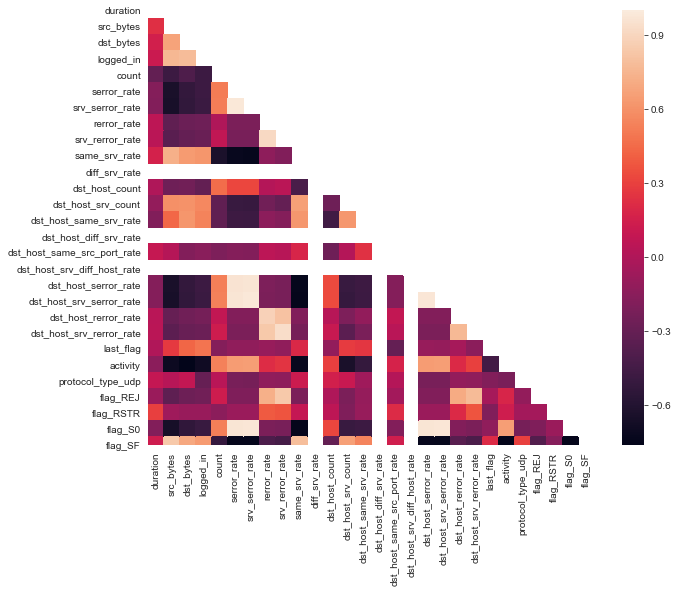

In [62]:
# graphical representation of correlation matrix using heatmap
plt.figure(figsize = (10, 8))
matrix = np.triu(scaled_df.corr())
sns.heatmap(scaled_df.corr(), mask=matrix);

In [63]:
thresold=0.90

print("--"*35)
print(f">> Feature-pairs having correlation coefficient more than {thresold*100}%")
print("--"*35)

high_corr_ser=scaled_df.corr().unstack().sort_values().where(lambda x: (abs(x)>thresold)&(x!=1)).dropna()
df_coeff=pd.DataFrame(high_corr_ser)
df_coeff=df_coeff.reset_index().rename(columns={'level_0':'var1','level_1':'var2',0:'correlation_coeff'})
df_coeff=df_coeff.iloc[::2].sort_values(by=['var1','var2']).reset_index(drop=True)
df_coeff

----------------------------------------------------------------------
>> Feature-pairs having correlation coefficient more than 90.0%
----------------------------------------------------------------------


,var1,var2,correlation_coeff
0,dst_host_serror_rate,flag_S0,0.971695
1,dst_host_serror_rate,serror_rate,0.958720
2,dst_host_srv_serror_rate,dst_host_serror_rate,0.976167
3,dst_host_srv_serror_rate,srv_serror_rate,0.980498
4,flag_S0,dst_host_srv_serror_rate,0.976401
5,flag_S0,srv_serror_rate,0.978286
6,rerror_rate,srv_rerror_rate,0.915603
7,serror_rate,dst_host_srv_serror_rate,0.967484
8,serror_rate,flag_S0,0.967226
9,srv_rerror_rate,dst_host_srv_rerror_rate,0.933920


In [64]:
#Hence, the dependent variable is binary

In [65]:
df_coeff['var1'].unique()

array(['dst_host_serror_rate', 'dst_host_srv_serror_rate', 'flag_S0',
       'rerror_rate', 'serror_rate', 'srv_rerror_rate', 'srv_serror_rate'],
      dtype=object)

In [66]:
scaled_df.shape

(125973, 28)

In [67]:
# dropping those independent variables having very high correlation with another independent variable
drop_cols_x=['diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate']
scaled_df.drop(columns=drop_cols_x, inplace=True)
scaled_df.shape

(125973, 25)

In [68]:
# updating column list
cat_cols_new=list(set(cat_cols_new)-set(drop_cols_x))
conti_cols_new=list(set(conti_cols_new)-set(drop_cols_x))

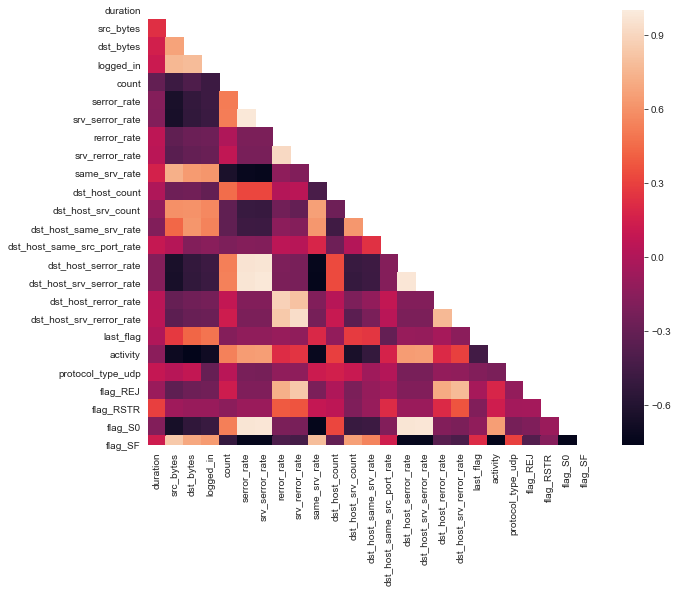

In [69]:
plt.figure(figsize = (10, 8))
matrix = np.triu(scaled_df.corr())
sns.heatmap(scaled_df.corr(), mask=matrix);

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
BINOMIAL CLASSIFICATION MODEL
<br><br></strong></div>

<div style="background-color:#ccd9ff;font-size: 150%"><strong><br>
Constructing Final dataset for model
<br><br></strong></div>

In [70]:
train_final=scaled_df.copy()
train_final.head()

,duration,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,activity,protocol_type_udp,flag_REJ,flag_RSTR,flag_S0,flag_SF
0,0,3,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
3,0,2,3,1,1,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,1
4,0,2,2,1,2,0,0,0,0,1,...,0,0,0,2,0,0,0,0,0,1


In [71]:
train_final.corr()

,duration,src_bytes,dst_bytes,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,activity,protocol_type_udp,flag_REJ,flag_RSTR,flag_S0,flag_SF
duration,1.000000,0.230055,0.149619,0.112167,-0.311612,-0.176113,-0.178284,0.060103,0.048283,0.163998,...,-0.177581,0.037990,0.047568,0.006218,-0.149137,0.085099,-0.085581,0.290879,-0.180047,0.130765
src_bytes,0.230055,1.000000,0.670545,0.762483,-0.486640,-0.641677,-0.649158,-0.325101,-0.355202,0.730163,...,-0.649790,-0.296635,-0.339545,0.273020,-0.707921,0.033884,-0.333086,-0.066762,-0.658250,0.834970
dst_bytes,0.149619,0.670545,1.000000,0.785083,-0.399192,-0.525478,-0.531901,-0.280696,-0.303987,0.638319,...,-0.534584,-0.258989,-0.293960,0.431623,-0.763632,0.082587,-0.273863,-0.089875,-0.541302,0.692990
logged_in,0.112167,0.762483,0.785083,1.000000,-0.487019,-0.485208,-0.491636,-0.264727,-0.287214,0.614539,...,-0.493992,-0.240038,-0.274690,0.490045,-0.690171,-0.297448,-0.253209,-0.093418,-0.500442,0.641738
count,-0.311612,-0.486640,-0.399192,-0.487019,1.000000,0.515062,0.520674,-0.003384,0.074351,-0.638234,...,0.532014,0.081705,0.127642,-0.177369,0.536295,0.039545,0.126381,-0.144118,0.528664,-0.513616
serror_rate,-0.176113,-0.641677,-0.525478,-0.485208,0.515062,1.000000,0.980512,-0.206948,-0.224034,-0.726158,...,0.967484,-0.183017,-0.209955,-0.125289,0.642996,-0.225453,-0.191922,-0.085863,0.967226,-0.743254
srv_serror_rate,-0.178284,-0.649158,-0.531901,-0.491636,0.520674,0.980512,1.000000,-0.208748,-0.225982,-0.738110,...,0.980498,-0.184543,-0.211783,-0.124830,0.651400,-0.227413,-0.193591,-0.086610,0.978286,-0.749827
rerror_rate,0.060103,-0.325101,-0.280696,-0.264727,-0.003384,-0.206948,-0.208748,1.000000,0.915603,-0.133768,...,-0.206192,0.879387,0.841085,-0.095505,0.215265,-0.124008,0.728856,0.389132,-0.208652,-0.408718
srv_rerror_rate,0.048283,-0.355202,-0.303987,-0.287214,0.074351,-0.224034,-0.225982,0.915603,1.000000,-0.190670,...,-0.223215,0.810262,0.933920,-0.124230,0.255878,-0.134246,0.834969,0.367470,-0.225879,-0.442636
same_srv_rate,0.163998,0.730163,0.638319,0.614539,-0.638234,-0.726158,-0.738110,-0.133768,-0.190670,1.000000,...,-0.745633,-0.184971,-0.232035,0.198739,-0.727877,0.119660,-0.211750,0.087925,-0.743898,0.790327


In [72]:
# a concise summary of the final dataset
train_final.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 25 columns):
duration                       int32
src_bytes                      int32
dst_bytes                      int32
logged_in                      int32
count                          int32
serror_rate                    int32
srv_serror_rate                int32
rerror_rate                    int32
srv_rerror_rate                int32
same_srv_rate                  int32
dst_host_count                 int32
dst_host_srv_count             int32
dst_host_same_srv_rate         int32
dst_host_same_src_port_rate    int32
dst_host_serror_rate           int32
dst_host_srv_serror_rate       int32
dst_host_rerror_rate           int32
dst_host_srv_rerror_rate       int32
last_flag                      int32
activity                       int32
protocol_type_udp              int32
flag_REJ                       int32
flag_RSTR                      int32
flag_S0                        int32
f

<div style="background-color:#ccd9ff;font-size: 200%"><strong><br>
MODEL BUILDING
<br><br></strong></div>

<div class="alert alert-warning"><strong> LOGISTIC REGRESSION</strong><br>
Logistic regression is a predictive analysis. <br>When the dependent variable or response is binary, the appropriate regression analysis to conduct is <tt>Logistic regression</tt>. 
<br><br>Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". </div>

In [73]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split

train,test = train_test_split(train_final, test_size = 0.3, random_state = 42)

In [74]:
# checking the shape of training and testing data to make sure about the division
print("Total records: ",train_final.shape[0])
print('\ntraining dataset', train.shape[0])
print('testing dataset', test.shape[0])

Total records:  125973

training dataset 88181
testing dataset 37792


In [75]:
selected_cols=['activity', 'logged_in', 'flag_SF', 'dst_host_srv_rerror_rate','same_srv_rate', 'dst_bytes']

#features not selected
#[x for x in train_final.columns if x not in selected_cols]

In [76]:
# feature selection
feature_cols = train_final.columns.difference(['activity', 'logged_in', 'flag_SF', 
                                               'dst_host_srv_rerror_rate','same_srv_rate', 'dst_bytes'])

In [77]:
# gathering features
feature_strings = "activity ~" + "+".join(feature_cols)
feature_strings

'activity ~count+dst_host_count+dst_host_rerror_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_serror_rate+dst_host_srv_count+dst_host_srv_serror_rate+duration+flag_REJ+flag_RSTR+flag_S0+last_flag+protocol_type_udp+rerror_rate+serror_rate+src_bytes+srv_rerror_rate+srv_serror_rate'

In [78]:
# importing the required libraries for model building
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression

In [79]:
lm = sm.logit(formula = feature_strings, data = train).fit()

Optimization terminated successfully.
         Current function value: 0.123222
         Iterations 11


In [80]:
# summarizing the Regression Results
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               activity   No. Observations:                88181
Model:                          Logit   Df Residuals:                    88161
Method:                           MLE   Df Model:                           19
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:                  0.8216
Time:                        17:27:53   Log-Likelihood:                -10866.
converged:                       True   LL-Null:                       -60894.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       1.3106      0.073     17.881      0.000       1.167       1.454
count                           0.7565      0.018     41.303      0.000       0.721       0.792
dst_host_count                  0.3257      0.056      5.819      0.000       0.216       0.435
dst_host_rerror_rate            2.6804      0.127     21.084      0.000       2.431       2.930
dst_host_same_src_port_rate     3.2875      0.060     54.719      0.000       3.170       3.405
dst_host_same_srv_rate         -1.2957      0.054    -24.176      0.000      -1.401      -1.191
dst_host_serror_rate            1.5104      0.303      4.981      0.000       0.916       2.105
dst_host_srv_count             -0.8272      0.028    -29.727      0.000      -0.882      -0.773
dst_host_srv_serror_rate        6.4953      0.353     18.395      0.000       5.803       7.187
duration                       -0.3036      0.020    -15.207      0.000      -0.343      -0.264
flag_REJ                        0.4707      0.128      3.670      0.000       0.219       0.722
flag_RSTR                       2.0589      0.175     11.780      0.000       1.716       2.401
flag_S0                         0.0558      0.142      0.392      0.695      -0.223       0.335
last_flag                      -2.4064      0.036    -67.048      0.000      -2.477      -2.336
protocol_type_udp              -2.3321      0.057    -40.784      0.000      -2.444      -2.220
rerror_rate                    -1.4114      0.212     -6.671      0.000      -1.826      -0.997
serror_rate                     0.1166      0.274      0.425      0.671      -0.421       0.654
src_bytes                      -0.2675      0.021    -12.840      0.000      -0.308      -0.227
srv_rerror_rate                 1.9143      0.219      8.761      0.000       1.486       2.343
srv_serror_rate                -0.4407      0.284     -1.554      0.120      -0.996       0.115
===============================================================================================
"""

<div style="background-color:#ccd9ff;font-size: 200%"><strong><br>
VARIATION INFLATION FACTOR (VIF)
<br><br></strong></div>
<div class="alert alert-warning">The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. 
<br>It is calculated by taking the the ratio of the variance of all a given model's betas and the variane of a single beta if it were fit alone</div>

In [81]:
# importing required libraries and funciton for variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [82]:
# getting y and X dataframes based on this regression:
y, X = dmatrices(feature_strings, train ,return_type = 'dataframe')

# For each X, calculating VIF and save in dataframe
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF score'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
#vif.head()

In [83]:
#vif.to_csv('vif.csv', index=False)

In [84]:
# inspecting VIF Factors
vif=vif.sort_values(['VIF score']).set_index('features')
vif

,VIF score
features,
duration,1.491406
last_flag,1.492871
dst_host_same_src_port_rate,1.512986
dst_host_count,1.584593
protocol_type_udp,1.742528
count,2.208440
dst_host_srv_count,2.464484
flag_RSTR,2.513957
dst_host_same_srv_rate,2.552287


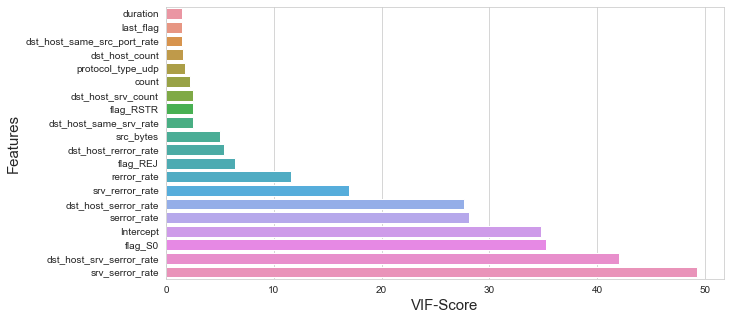

In [85]:
plt.figure(figsize=(10,5))
sns.barplot(x='VIF score', y=vif.index, data=vif)
plt.xlabel("VIF-Score",fontsize=15)
plt.ylabel("Features",fontsize=15);

<div class="alert alert-warning"><strong>NOTE:</strong>
 <br>For this classification problem,<br> the target variable is assigned  with 0 when the activity is 'normal' and <br>whenever there is an attack it is assigned  with 1<br><br> So, the probability predicted by the model is actually the probability of whether the activity would be an attack</div>

In [86]:
# predicting probabilities
train['pred_prob'] = lm.predict(train)
test['pred_prob'] = lm.predict(test)

In [87]:
train_final.shape,train.shape,test.shape

((125973, 25), (88181, 26), (37792, 26))

<div style="background-color:#3366ff;text-align: center; font-size: 300%"><strong><br>
MODEL   EVALUATION
<br><br></strong></div>

<div style="background-color:#ccd9ff;font-size: 200%"><strong><br>
ROC AUC SCORE
<br><br></strong></div>

<div class="alert alert-warning"><strong>NOTE:</strong>
 <br>If ROC AUC SCORE is coming out to be good in training and testing dataset, <br>we can consider our model good</div> 

In [88]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [92]:
print("-------------------\n  ROC AUC SCORE\n-------------------")
print('score of training data: ', round(roc_auc_score(train['activity'], train['pred_prob']),6))
print('score of testing data: ', round(roc_auc_score(test['activity'], test['pred_prob']),6))

print("--"*25)
print("  Response rate (Proportion of 1 vs 0)")
print("--"*25)
print("training dataset: {},\ntesting dataset: {}\n".format(train['activity'].mean(),test['activity'].mean()) )

print("--"*25)
print("Average of predicted probalities", train['pred_prob'].mean())
print("--"*25)
print("training dataset: {},\ntesting dataset: {}".format(train['pred_prob'].mean(),test['pred_prob'].mean()) )

-------------------
  ROC AUC SCORE
-------------------
score of training data:  0.990986
score of testing data:  0.991232
--------------------------------------------------
  Response rate (Proportion of 1 vs 0)
--------------------------------------------------
training dataset: 0.46405688300200726,
testing dataset: 0.46859123624047416

--------------------------------------------------
Average of predicted probalities 0.46405688300193754
--------------------------------------------------
training dataset: 0.46405688300193754,
testing dataset: 0.4695959277215969


<div style="background-color:#ccd9ff; font-size: 250%"><strong><br>
Bi-variate Analysis : Somers'D
<br><br></strong></div>

In [101]:
#taking any one column
colname='srv_serror_rate' 

lm1 = sm.logit(formula =str("activity ~"+colname ), 
               data = train_final).fit()
y_score1=lm1.predict()
roc=roc_auc_score(train_final['activity'], y_score1)

print("\n>>roc-auc-score: ",roc)
print(">>somers'D value: ",2*roc-1)

Optimization terminated successfully.
         Current function value: 0.432471
         Iterations 9

>>roc-auc-score:  0.792159021104087
>>somers'D value:  0.584318042208174


## Checking the predictive power of each independent against dependent

## Getting the Somer's D value for each of the X - dependent variables

In [102]:
# empty dataframe
somersd_df = pd.DataFrame()

# iterating for each of the X - dependant variables and get the Somer's D value
for var in feature_cols:   
    logreg = sm.logit(formula = str('activity ~ ') + str(var),
                      data = train_final).fit()# executing the logit model
    y_score = pd.DataFrame(logreg.predict(),columns=['Score'])#creates a dataframe with the predicted probabilities
    
    somers_d = 2 * roc_auc_score(train_final['activity'], y_score) - 1 # calculating the Somer's D values
    
    temp_df = pd.DataFrame([var, somers_d]).T # vars and corresponding Somers' D score in a temp dataframe
    temp_df.columns = ['Variable Name', 'SomersD']
    
    somersd_df = pd.concat([somersd_df, temp_df], axis=0) # appending the data in the dataframe for all the X variables

Optimization terminated successfully.
         Current function value: 0.531891
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.645257
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.669239
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.675317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.544370
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.433034
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.455590
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.423890
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.678791
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673099


In [103]:
# printing the Somer's D values for all variables
somersd_df.sort_values(by = 'SomersD', ascending = False).set_index('Variable Name')

,SomersD
Variable Name,
src_bytes,0.79834
dst_host_srv_count,0.710625
count,0.597937
srv_serror_rate,0.584318
dst_host_srv_serror_rate,0.583221
flag_S0,0.583128
serror_rate,0.574538
dst_host_serror_rate,0.570363
dst_host_same_srv_rate,0.508155


<div style="background-color:#ccd9ff ; font-size: 250%"><strong><br>
Kolmogorov-Smirnov test for goodness of fit
<br><br></strong></div>

<div class='alert alert-warning'><strong> NOTE:</strong><br>
    Kolmogorov-Smirnov test looks at maximum difference between distribution of cumulative events and cumulative non-events.
<br>KS statistics should be in top 5 deciles.
<br>KS statistics should be between 40 and 70.</div>

## Assigning the deciles

In [104]:
# putting variables into 10 equal-sized buckets.
train['deciles'] = pd.qcut(train.pred_prob, 10, labels = False)
test['deciles'] = pd.qcut(test.pred_prob, 10, labels = False)

## For training dataset



In [105]:
ks_train=pd.DataFrame()

# deriving minimum & maximmum probability, number of ones & zeros and total count
ks_train['min_prob'] = train.groupby(train.deciles)['deciles', 'pred_prob'].min().sort_index(ascending=False)['pred_prob']
ks_train['max_prob'] = train.groupby(train.deciles)['deciles', 'pred_prob'].max().sort_index(ascending=False)['pred_prob']
ks_train['total_count'] = train.groupby(train.deciles)['deciles', 'activity'].count().sort_index(ascending=False)['activity']
ks_train['#1s']= train.groupby(train.deciles)['deciles', 'activity'].sum().sort_index(ascending=False)['activity']
ks_train['#0s']=ks_train['total_count']-ks_train['#1s']

ks_train=ks_train.reset_index()

In [106]:
# finding the percentage of when the activity is normal(AN) and when the activity is of attack type (AA)
ks_train['perc_AN'] = round((ks_train['#1s'] * 100) / ks_train['#1s'].sum(), 2)
ks_train['perc_AA'] = round((ks_train['#0s'] * 100) / ks_train['#0s'].sum(), 2)

# deriving cumlative percentage of normal activity(AN) and attack activiy (AA)
ks_train['cum_perc_AN'] =ks_train['perc_AN'].cumsum()
ks_train['cum_perc_AA'] = ks_train['perc_AA'].cumsum()

# Perform the Kolmogorov-Smirnov test for goodness of fit.
ks_train['KS_Score'] = ks_train['cum_perc_AN'] - ks_train['cum_perc_AA']

ks_train

,deciles,min_prob,max_prob,total_count,#1s,#0s,perc_AN,perc_AA,cum_perc_AN,cum_perc_AA,KS_Score
0,9,0.999896,0.999997,8758,8753,5,21.39,0.01,21.39,0.01,21.38
1,8,0.998992,0.999895,8813,8797,16,21.50,0.03,42.89,0.04,42.85
2,7,0.994414,0.998990,8623,8616,7,21.06,0.01,63.95,0.05,63.90
3,6,0.847678,0.994253,9066,8453,613,20.66,1.30,84.61,1.35,83.26
4,5,0.250544,0.846344,8706,4934,3772,12.06,7.98,96.67,9.33,87.34
5,4,0.026445,0.248849,8928,1360,7568,3.32,16.01,99.99,25.34,74.65
6,3,0.004425,0.026231,7704,8,7696,0.02,16.28,100.01,41.62,58.39
7,2,0.002082,0.004425,9644,0,9644,0.00,20.41,100.01,62.03,37.98
8,1,0.001504,0.002081,9000,0,9000,0.00,19.04,100.01,81.07,18.94
9,0,0.000037,0.001499,8939,0,8939,0.00,18.91,100.01,99.98,0.03


In [110]:
ks_train.loc[ks_train['KS_Score']==ks_train['KS_Score'].max()]

,deciles,min_prob,max_prob,total_count,#1s,#0s,perc_AN,perc_AA,cum_perc_AN,cum_perc_AA,KS_Score
4,5,0.250544,0.846344,8706,4934,3772,12.06,7.98,96.67,9.33,87.34


<div class="alert alert-warning"><strong>NOTE:</strong><br>We can see that the maximum separation that we receive is in the fifth decile. <br>The maximum differentiation between the normal-activity and attack is in the 5th decile mand the KS static comes out to be 87.34%.

In [111]:
# exporting ks file
#ks.to_csv('ks_score.csv', index=False)

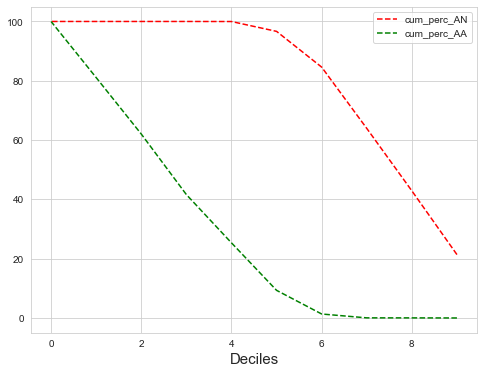

In [112]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ks_train['deciles'], ks_train['cum_perc_AN'], 'r--', label='cum_perc_AN')
ax.plot(ks_train['deciles'], ks_train['cum_perc_AA'], 'g--', label='cum_perc_AA')

ax.legend(loc='best')
plt.xlabel("Deciles",fontsize=15);

## For testing dataset

In [117]:
ks_test=pd.DataFrame()

# deriving minimum & maximmum probability, number of ones & zeros and total count
ks_test['min_prob'] = test.groupby(test.deciles)['deciles', 'pred_prob'].min().sort_index(ascending=False)['pred_prob']
ks_test['max_prob'] = test.groupby(test.deciles)['deciles', 'pred_prob'].max().sort_index(ascending=False)['pred_prob']
ks_test['total_count'] = test.groupby(test.deciles)['deciles', 'activity'].count().sort_index(ascending=False)['activity']
ks_test['#1s']= test.groupby(test.deciles)['deciles', 'activity'].sum().sort_index(ascending=False)['activity']
ks_test['#0s']=ks_test['total_count']-ks_test['#1s']

ks_test=ks_test.reset_index()

In [118]:
# finding the percentage of when the activity is normal(AN) and when the activity is of attack type (AA)
ks_test['perc_AN'] = round((ks_test['#1s'] * 100) / ks_test['#1s'].sum(), 2)
ks_test['perc_AA'] = round((ks_test['#0s'] * 100) / ks_test['#0s'].sum(), 2)

# deriving cumlative percentage of normal activity(AN) and attack activiy (AA)
ks_test['cum_perc_AN'] =ks_test['perc_AN'].cumsum()
ks_test['cum_perc_AA'] = ks_test['perc_AA'].cumsum()

# Perform the Kolmogorov-Smirnov test for goodness of fit.
ks_test['KS_Score'] = ks_test['cum_perc_AN'] - ks_test['cum_perc_AA']

ks_test

,deciles,min_prob,max_prob,total_count,#1s,#0s,perc_AN,perc_AA,cum_perc_AN,cum_perc_AA,KS_Score
0,9,0.999899,0.999997,3776,3772,4,21.30,0.02,21.30,0.02,21.28
1,8,0.998992,0.999898,3762,3755,7,21.20,0.03,42.50,0.05,42.45
2,7,0.994414,0.998990,3797,3792,5,21.41,0.02,63.91,0.07,63.84
3,6,0.866390,0.994253,3732,3578,154,20.20,0.77,84.11,0.84,83.27
4,5,0.277354,0.865875,3827,2215,1612,12.51,8.03,96.62,8.87,87.75
5,4,0.029468,0.276378,3757,593,3164,3.35,15.75,99.97,24.62,75.35
6,3,0.004480,0.029348,3468,4,3464,0.02,17.25,99.99,41.87,58.12
7,2,0.002206,0.004425,4096,0,4096,0.00,20.40,99.99,62.27,37.72
8,1,0.001574,0.002108,2855,0,2855,0.00,14.22,99.99,76.49,23.50
9,0,0.000035,0.001504,4722,0,4722,0.00,23.51,99.99,100.00,-0.01


In [279]:
# exporting ks file
#ks.to_csv('ks_score.csv', index=False)

In [119]:
ks_test.loc[ks_test['KS_Score']==ks_test['KS_Score'].max()]

,deciles,min_prob,max_prob,total_count,#1s,#0s,perc_AN,perc_AA,cum_perc_AN,cum_perc_AA,KS_Score
4,5,0.277354,0.865875,3827,2215,1612,12.51,8.03,96.62,8.87,87.75


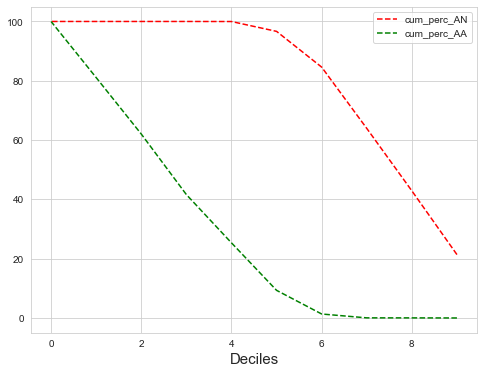

In [120]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ks_train['deciles'], ks_train['cum_perc_AN'], 'r--', label='cum_perc_AN')
ax.plot(ks_train['deciles'], ks_train['cum_perc_AA'], 'g--', label='cum_perc_AA')

ax.legend(loc='best')
plt.xlabel("Deciles",fontsize=15);

<div class="alert alert-warning"><strong>NOTE:</strong><br>Here in test data,We can see that the maximum separation that we receive is in the fifth decile. <br>The maximum differentiation between the normal-activity and attack is in the 5th decile mand the KS static comes out to be 87.75%.

In [121]:
train['predicted_activity'] = train['pred_prob'].apply(lambda x: 1 if x > 0.27 else 0)
test['predicted_activity'] = test['pred_prob'].apply(lambda x: 1 if x > 0.27 else 0)

In [122]:
train.shape,test.shape

((88181, 28), (37792, 28))

In [123]:
train['activity'].value_counts()

0    47260
1    40921
Name: activity, dtype: int64

In [124]:
train['predicted_activity'].value_counts()

0    44601
1    43580
Name: predicted_activity, dtype: int64

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
FURTHER EVALUATION
<br><br></strong></div>

<div style="background-color:#ccd9ff ; font-size: 250%"><strong><br>
CONFUSION MATRIX
<br><br></strong></div>
<div class="alert alert-warning">
Confusion matrix is one of the most powerful and commonly used evaluation technique<br>It helps to compute a whole lot of other metrics that allow us to evaluate the performance of a classification model.</div>

In [125]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score,roc_curve

## For Training dataset

In [126]:
cm_train = confusion_matrix(train['activity'], train['predicted_activity'])
cm_train

array([[43168,  4092],
       [ 1433, 39488]], dtype=int64)

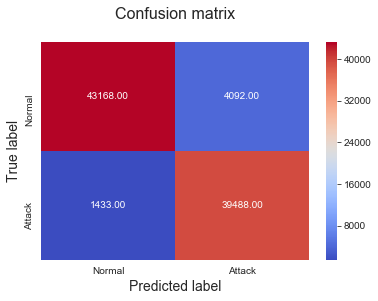

In [127]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(cm_train, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=["Normal", "Attack"], 
            yticklabels=["Normal", "Attack"])
plt.title('Confusion matrix\n', fontsize=16)
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14)
plt.autoscale(enable=True, axis='y')

### The accuracy score in training dataset for the logistic regression model comes out to be ~93.92%

In [128]:
# Accuracy
print("Accuracy: ",accuracy_score(train['activity'], train['predicted_activity']))

# precision and recall
print("Precision: ", precision_score(train['activity'], train['predicted_activity']))
print("Recall: ",recall_score(train['activity'], train['predicted_activity']))

# roc_auc_score
print('roc_auc_score:', roc_auc_score(train['activity'], train['predicted_activity']))

Accuracy:  0.9373447794876447
Precision:  0.9061037173015145
Recall:  0.9649813054421935
roc_auc_score: 0.9391982278374743


## For Testing dataset

In [129]:
cm_test = confusion_matrix(test['activity'], test['predicted_activity'])
cm_test

array([[18296,  1787],
       [  582, 17127]], dtype=int64)

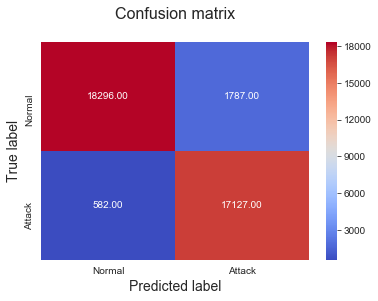

In [130]:
# Visualizing Confusion Matrix using Heatmap
sns.heatmap(cm_test, annot=True, fmt='.2f', cmap='coolwarm',
            xticklabels=["Normal", "Attack"], 
            yticklabels=["Normal", "Attack"])
plt.title('Confusion matrix\n', fontsize=16)
plt.ylabel('True label',fontsize=14)
plt.xlabel('Predicted label',fontsize=14)
plt.autoscale(enable=True, axis='y')

In [131]:
### The accuracy score in testing dataset for the logistic regression model comes out to be ~93.73% as well

# Accuracy
print("Accuracy: ",accuracy_score(test['activity'], test['predicted_activity']))

# precision and recall
print("Precision: ", precision_score(test['activity'], test['predicted_activity']))
print("Recall: ",recall_score(test['activity'], test['predicted_activity']))

# roc_auc_score
print('roc_auc_score: ' , roc_auc_score(test['activity'], test['predicted_activity']))

Accuracy:  0.9373147756138865
Precision:  0.9055197208417045
Recall:  0.9671353549042859
roc_auc_score:  0.9390773124668319


<div style="background-color:#ccd9ff ; font-size: 250%"><strong><br>
ROC AUC Curve
<br><br></strong></div> 
<div class="alert alert-warning">Another way to evaluate logistic regression is ROC AUC Curve. 
<br><br>This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.</div>

## For training set

In [132]:
# compute true positive rate(tpr) and false positive rate(fpr)
fpr, tpr, thresholds = roc_curve(train['activity'], (train['pred_prob']))

In [137]:
fpr.shape,tpr.shape,thresholds.shape

((1437,), (1437,), (1437,))

In [138]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99980956, 0.99987304,
       1.        ])

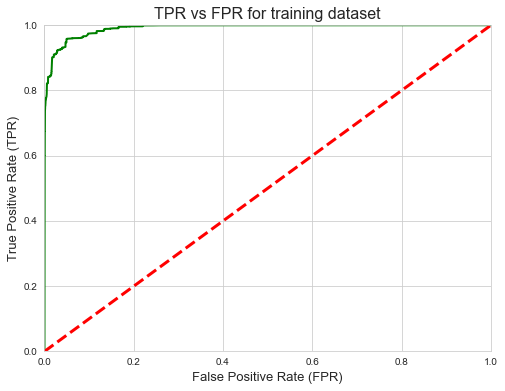

In [142]:
# plotting FPR vs TPR
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, 'g',linewidth=2,label=None)
plt.plot([0, 1], [0, 1], 'r--', linewidth=3)
plt.axis([0, 1, 0, 1])

plt.title("TPR vs FPR for training dataset", fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=13)
plt.ylabel('True Positive Rate (TPR)', fontsize=13);

<div class="alert alert-warning"><strong>NOTE:</strong><br>>The red line represents a purely random classifier and the green line is for our classifier model. 
 <br>>Therefore our classifier should be as far away from it as possible and our logistic regression model seems to do a good job.</div>

## For Testing dataset

In [146]:
# compute true positive rate and false positive rate
fpr2, tpr2, thresholds2 = roc_curve(test['activity'], (test['pred_prob']))

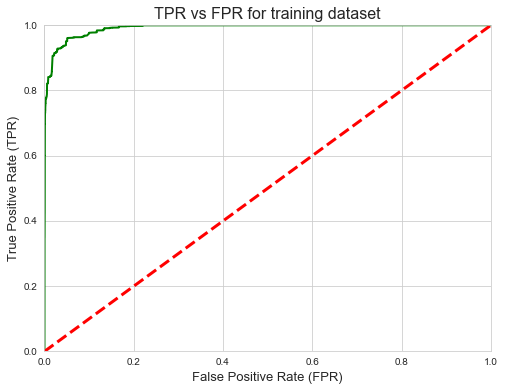

In [147]:
# plotting FPR vs TPR
plt.figure(figsize=(8,6))
plt.plot(fpr2, tpr2, 'g',linewidth=2,label=None)
plt.plot([0, 1], [0, 1], 'r--', linewidth=3)
plt.axis([0, 1, 0, 1])

plt.title("TPR vs FPR for training dataset", fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=13)
plt.ylabel('True Positive Rate (TPR)', fontsize=13);

<div style="background-color:#3366ff;text-align: center; font-size: 250%"><strong><br>
Predicting Activity for a new dataset
<br><br></strong></div>


In [148]:
# new testing dataset
print(test_df.shape)
test_df.head()

(22544, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [149]:
test_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [150]:
# splitting continous and categorical variables to get better clarity of the training dataset.
test_df_cat_vars = test_df.loc[:, test_df.dtypes == 'object']
test_df_conti_vars =test_df.loc[:, test_df.dtypes != 'object']

test_df_cat_vars.shape,  test_df_conti_vars.shape

((22544, 4), (22544, 39))

In [151]:
# standardizing the variables
selected_cols = ['dst_bytes', 'src_bytes', 'duration', 'count', 'srv_count', 'dst_host_count', 'dst_host_srv_count', 'last_flag']
num_data = test_df_conti_vars.copy()

for col in selected_cols:
    num_data.loc[(num_data[col] <= num_data[col].quantile(.25)), col] = 0
    num_data.loc[(num_data[col] > num_data[col].quantile(.25)) & (num_data[col] <= num_data[col].quantile(.50)), col] = 1
    num_data.loc[(num_data[col] > num_data[col].quantile(.50)) & (num_data[col] <= num_data[col].quantile(.75)), col] = 2
    num_data.loc[(num_data[col] > num_data[col].quantile(.75)) & (num_data[col] <= num_data[col].quantile(.95)), col] = 3
    num_data.loc[(num_data[col] > num_data[col].quantile(.95)), col] = 4

num_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,0,0,0,0,0,0,0,0,0,0,...,0,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,2
2,3,3,0,0,0,0,0,0,0,0,...,1,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,2
3,0,1,0,0,0,0,0,0,0,0,...,1,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,0
4,3,0,1,0,0,0,0,0,0,0,...,1,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,0


In [152]:
for col in selected_cols:
    print(f">>{col}: {num_data[col].unique()}")

>>dst_bytes: [0 1 4 2 3]
>>src_bytes: [0 3 1 2 4]
>>duration: [0 3 4]
>>count: [3 0 1 2 4]
>>srv_count: [2 0 3 1 4]
>>dst_host_count: [1 0]
>>dst_host_srv_count: [0 1 2]
>>last_flag: [2 0 1]


In [153]:
# count of unique values
for col in test_df_cat_vars.columns:
    print(f">>{col}: {test_df_cat_vars[col].nunique()}")

>>protocol_type: 3
>>service: 64
>>flag: 11
>>attack: 38


In [154]:
#dropping 'attack', 'service' columns
test_df_cat_vars = test_df_cat_vars.drop(['attack', 'service'], axis=1)

In [155]:
test_df_cat_vars.shape

(22544, 2)

In [156]:
# Creating dummy variables for training dataset
for feature in ['protocol_type', 'flag']:
    test_df_cat_vars[feature] = test_df_cat_vars[feature].astype('category')
    test_df_cat_vars = create_dummies(test_df_cat_vars, feature)

In [157]:
test_df_cat_vars.shape

(22544, 12)

In [158]:
# concatinating continous and categorical variables to get the final dataset
test_final = pd.concat([num_data, test_df_cat_vars], axis=1)

# coverting all the features to int data type
for col in test_final.columns:
    test_final[col] = test_final[col].astype(int)

In [159]:
# predicting probability with our previously built model
test_final['prob'] = lm.predict(test_final)

In [160]:
# doing the final prediction at 0.27 as cutoff
test_final['activity'] = test_final['prob'].apply(lambda x: 1 if x > 0.27 else 0)

In [161]:
#test_final.to_csv('submission.csv', index=False)

In [162]:
# the count of observations of each activity
test_final.activity.value_counts()

1    11387
0    11157
Name: activity, dtype: int64

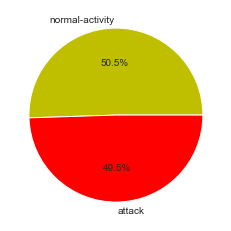

In [163]:
plt.pie(test_final['activity'].value_counts(),
        labels=['normal-activity','attack'],
        colors=['y','r'], 
        autopct='%1.1f%%');

### From the above graph we can see that ~51% of activities are normal whereas ~49% are of attack type in the final testing dataset.

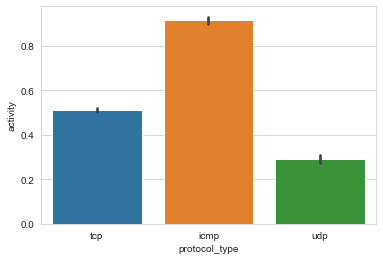

In [164]:
# the graphical representation of the count of observations of each activity by protocol_type.
sns.barplot(x=test_df.protocol_type, y=test_final.activity);